<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 5 | Notebook 3: Visualizations

### Carly Sharma, Jake Parker, & Adam Zucker

**CONTENTS:**
- Visualizations based on our EDA in Notebook 2, and tuned based on our models in Notebook 4. Our source data was collected from:
    - [Kaggle's](https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020?select=California_Fire_Incidents.csv) California Wildfire Incidents dataset
    - [NOAA](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00946/html) Meteorological data
    - Atmospheric carbon data collected by [NOAA/Mauna Loa Observatory](https://www.esrl.noaa.gov/gmd/dv/data/index.php?parameter_name=Carbon%2BDioxide&search=mauna+loa))

**BELOW:** Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

In [2]:
df = pd.read_csv('../data_clean/true_df.csv')

In [3]:
df.head()

,date,county,latitude,longitude,fire_name,acres_burned,fire_bins,duration,started,extinguished,...,dt32,dx32,dx70,cooling_degree_days,elevation,co2_measured_mole_fraction,qc_flag,temp_range,month,season
0,2017-12-01,santa barbara,34.717960,-120.270770,Drum Fire,14.0,1,24.0,2017-12-16 12:21:00+00:00,2018-01-09 13:49:00+00:00,...,3.692308,0.0,15.692308,12.153846,222.547059,407.70,pass,26.076923,12,winter
1,2017-12-01,santa barbara,34.605358,-120.414875,Coast Fire,14.0,1,26.0,2017-12-14 12:59:00+00:00,2018-01-09 13:49:00+00:00,...,3.692308,0.0,15.692308,12.153846,222.547059,406.14,pass,26.076923,12,winter
2,2017-12-01,ventura,34.415210,-119.091240,Thomas Fire,281893.0,6,464.0,2017-12-04 18:28:00+00:00,2019-03-14 11:24:00+00:00,...,7.000000,0.0,16.833333,23.416667,446.005556,407.21,pass,27.825000,12,winter
3,2017-12-01,riverside,33.965140,-117.476400,Riverdale Fire,40.0,1,36.0,2017-12-04 12:26:00+00:00,2018-01-09 13:47:00+00:00,...,2.681818,0.0,17.318182,12.045455,534.661905,407.21,pass,26.281818,12,winter
4,2017-12-01,riverside,33.592570,-117.149790,Liberty Fire,300.0,4,33.0,2017-12-07 13:14:00+00:00,2018-01-09 13:47:00+00:00,...,2.681818,0.0,17.318182,12.045455,534.661905,406.61,pass,26.281818,12,winter


In [4]:
df.shape

(907, 32)

In [5]:
df.isna().sum()

date                            0
county                          0
latitude                        0
longitude                       0
fire_name                       0
acres_burned                    0
fire_bins                       0
duration                        0
started                         0
extinguished                   54
major_incident                  0
admin_unit                      0
avg_wind_speed                  0
avg_monthly_temp                0
extreme_max_temp                0
extreme_min_temp                0
total_monthly_precipitation     0
total_monthly_snowfall          0
highest_daily_snowfall          0
dsnd                            0
dp10                            0
dt00                            0
dt32                            0
dx32                            0
dx70                            0
cooling_degree_days             0
elevation                       0
co2_measured_mole_fraction      0
qc_flag                         0
temp_range    

---
---

## General EDA Visualizations

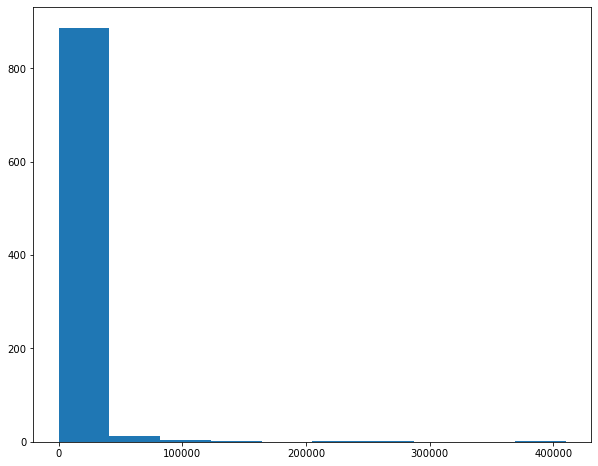

In [6]:
# Seeing the distribution of acres burned
plt.figure(figsize= (10,8))
plt.hist(x = df['acres_burned']);

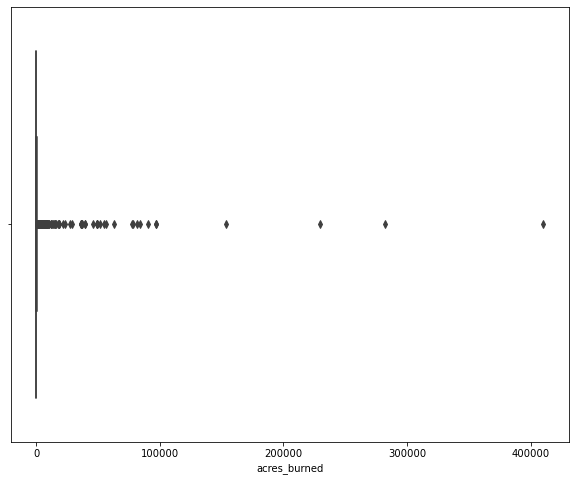

In [7]:
# look at outliers for all of acres burned
plt.figure(figsize= (10,8))
sns.boxplot(x=df['acres_burned']);

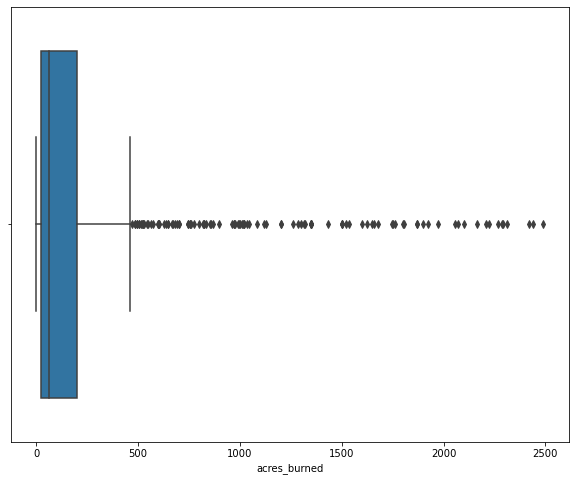

In [8]:
# tried removing some of the largest outliers
plt.figure(figsize= (10,8))
drop_outliers = df[df['acres_burned'] < 2500]
sns.boxplot(x=drop_outliers['acres_burned']);

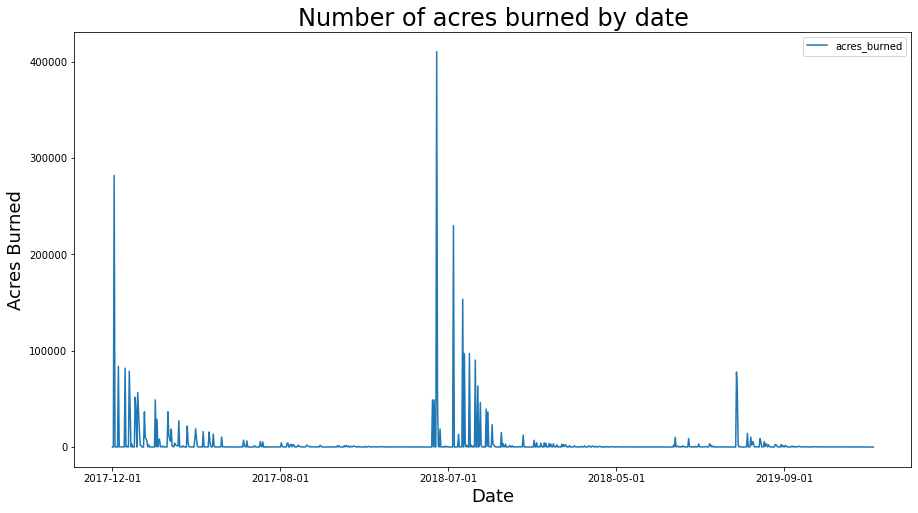

In [9]:
# Look at acres burned by date
df.plot(kind='line',x='date',y='acres_burned', figsize= (15,8))
plt.ylabel('Acres Burned', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.title('Number of Acres Burned by Date', fontsize=24);

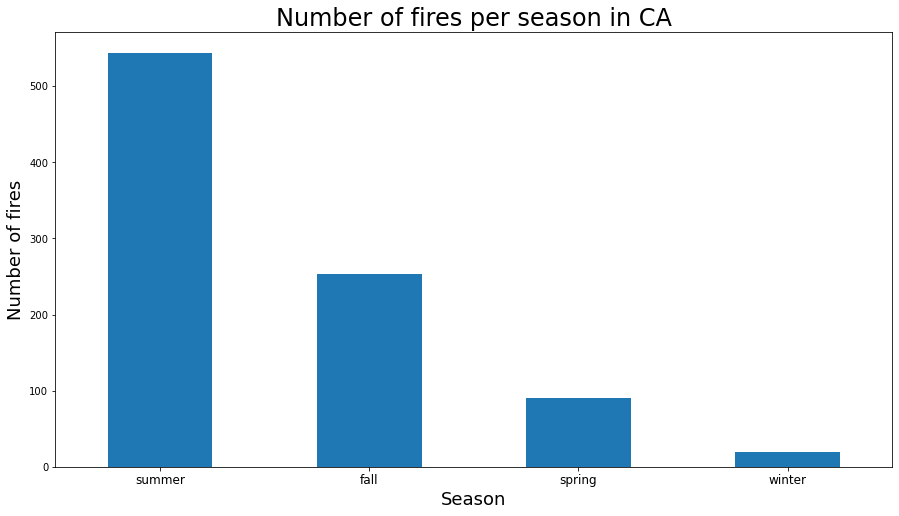

In [10]:
# Plot the number of rows (aka fires) by season
plt.figure(figsize= (15,8))
df['season'].value_counts().plot(kind='bar')
plt.ylabel('Number of fires', fontsize=18)
plt.xlabel('Season', fontsize=18)
plt.xticks(rotation= 360, fontsize = 12)
plt.title('Number of fires per season in CA', fontsize=24);

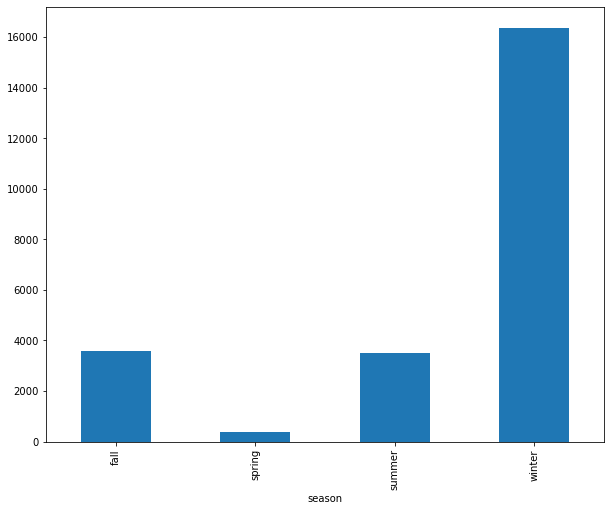

In [11]:
# Plot the avg. acres burned by season
plt.figure(figsize= (10,8))
df.groupby('season')['acres_burned'].mean().plot(kind='bar');

In [12]:
# View number of fires per month
df['month'].value_counts().T

7     207
6     185
8     152
9     122
10    111
5      70
11     20
4      19
12     14
2       4
3       2
1       1
Name: month, dtype: int64

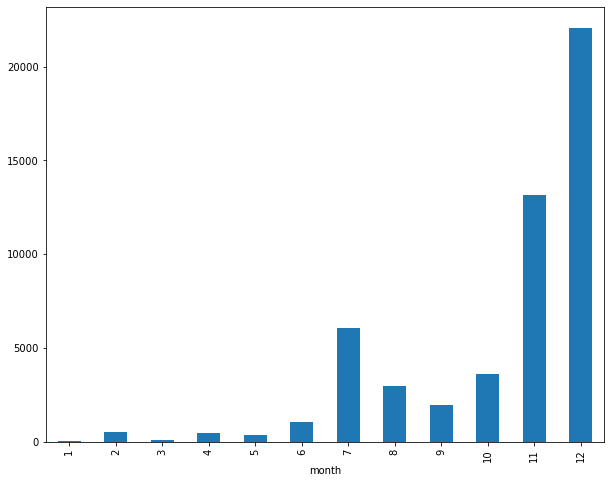

In [13]:
# View avg. acres burned by month (bar graph)
plt.figure(figsize= (10,8))
df.groupby('month')['acres_burned'].mean().plot(kind='bar');

**The avg. acres burned graph was being skewed by few fires in winter, but large ones. Therefore, the sum of total acres burned seems better.**

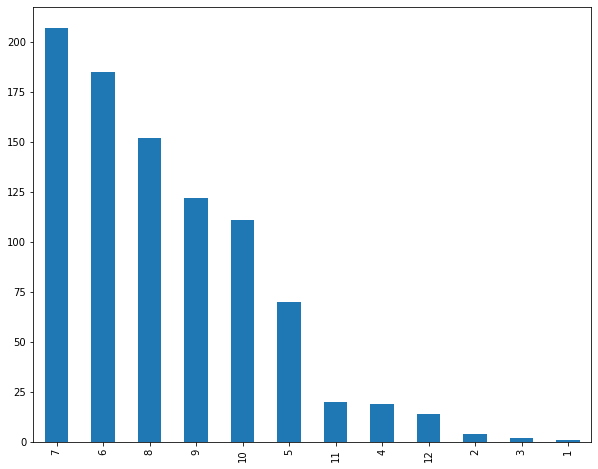

In [14]:
# View total fires burned by month (bar graph)
plt.figure(figsize= (10,8))
df['month'].value_counts().plot(kind='bar');

In [15]:
# Check out summary averages by season of different features
df.groupby('season').mean().T

season,fall,spring,summer,winter
latitude,36.464156,35.154030,37.251869,33.479482
longitude,-119.624956,-116.710918,-119.156673,-112.666163
acres_burned,3588.114625,389.131868,3506.174632,16372.210526
fire_bins,2.916996,2.318681,2.726103,2.842105
duration,73.882846,198.692308,139.837849,125.789474
major_incident,0.256917,0.054945,0.170956,0.368421
avg_wind_speed,5.775098,7.580992,6.456390,6.004027
avg_monthly_temp,64.849389,61.819867,74.136801,53.129633
extreme_max_temp,92.748376,89.364865,99.343499,77.046582
extreme_min_temp,39.237685,39.176779,50.165004,29.250624


In [16]:
# Drill down into most interesting ones
int_features = ['avg_monthly_temp', 'total_monthly_precipitation', 
                     'extreme_max_temp', 'extreme_min_temp', 'dx70', 'elevation']
df.groupby('season')[int_features].mean().T

season,fall,spring,summer,winter
avg_monthly_temp,64.849389,61.819867,74.136801,53.129633
total_monthly_precipitation,0.528961,1.040175,0.098794,1.410511
extreme_max_temp,92.748376,89.364865,99.343499,77.046582
extreme_min_temp,39.237685,39.176779,50.165004,29.250624
dx70,23.415123,19.480686,28.863703,11.591897
elevation,573.524260,552.301610,634.569056,590.438847


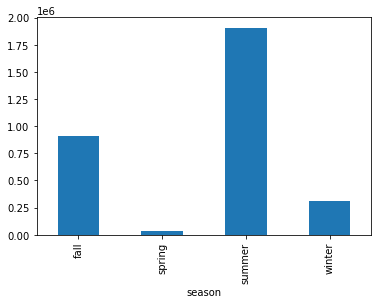

In [17]:
# Total acres burned by season
df.groupby('season')['acres_burned'].sum().plot(kind='bar');

---
---

## By Bin

**REMINDER: Bin Parameters**
- **Bin 1:** 50 acres or below
- **Bin 2:** 100 acres or below, and greater than 50 acres
- **Bin 3:** 250 acres or below, and greater than 100 acres
- **Bin 4:** 500 acres or below, and greater than 250 acres
- **Bin 5:** 1000 acres or below, and greater than 500 acres
- **Bin 6:** Greater than 1000 acres burned

In [18]:
df['fire_bins'].value_counts()

1    353
6    149
3    146
2    141
4     71
5     47
Name: fire_bins, dtype: int64

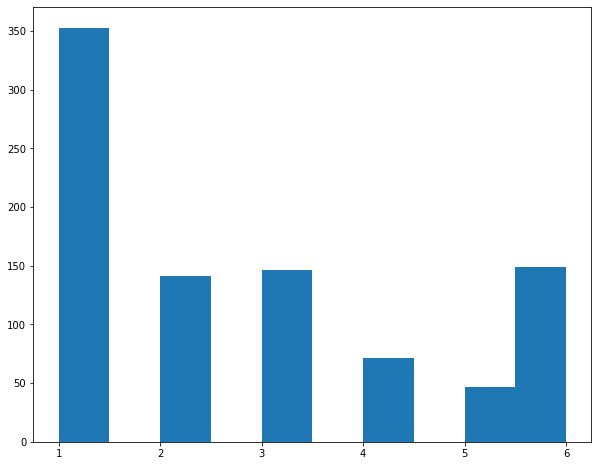

In [19]:
# See the distribution of bins
plt.figure(figsize= (10,8))
ax = plt.hist(df['fire_bins']);

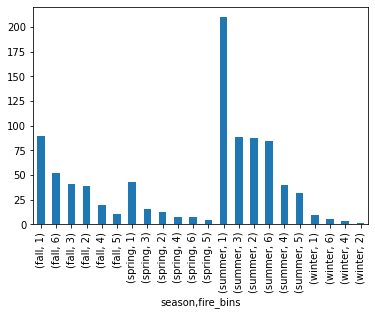

In [20]:
# Plot number of types of fire bins per season
df.groupby('season')['fire_bins'].value_counts().plot(kind='bar');

In [21]:
df.groupby('season')['fire_bins'].value_counts()

season  fire_bins
fall    1             90
        6             52
        3             41
        2             39
        4             20
        5             11
spring  1             43
        3             16
        2             13
        4              8
        6              7
        5              4
summer  1            210
        3             89
        2             88
        6             85
        4             40
        5             32
winter  1             10
        6              5
        4              3
        2              1
Name: fire_bins, dtype: int64

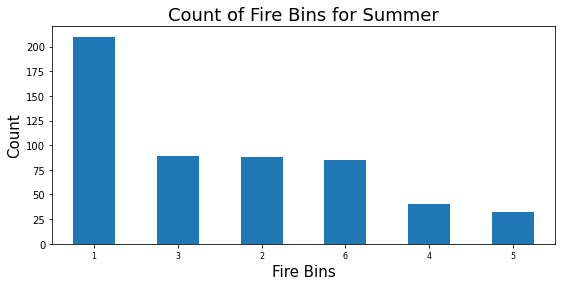

In [22]:
# Plot the number of fire bins for summer 
plt.figure(figsize= (9,4))
df[df['season']=='summer']['fire_bins'].value_counts().plot(kind='bar')
plt.ylabel('Count', fontsize=15)
plt.xlabel('Fire Bins', fontsize=15)
plt.xticks(rotation= 360, fontsize = 8)
plt.title('Count of Fire Bins for Summer', fontsize=18);

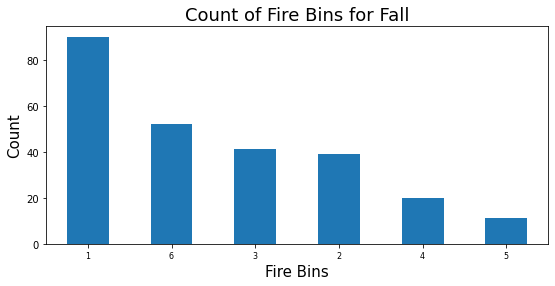

In [23]:
# Plot the number of fire bins for fall 
plt.figure(figsize= (9,4))
df[df['season']=='fall']['fire_bins'].value_counts().plot(kind='bar')
plt.ylabel('Count', fontsize=15)
plt.xlabel('Fire Bins', fontsize=15)
plt.xticks(rotation= 360, fontsize = 8)
plt.title('Count of Fire Bins for Fall', fontsize=18);

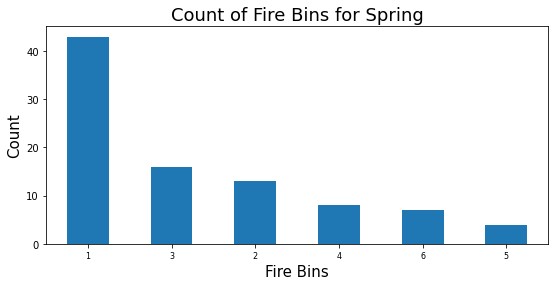

In [24]:
# Plot the number of fire bins for spring 
plt.figure(figsize= (9,4))
df[df['season']=='spring']['fire_bins'].value_counts().plot(kind='bar')
plt.ylabel('Count', fontsize=15)
plt.xlabel('Fire Bins', fontsize=15)
plt.xticks(rotation= 360, fontsize = 8)
plt.title('Count of Fire Bins for Spring', fontsize=18);

**Interesting that summer has so many small fires.**

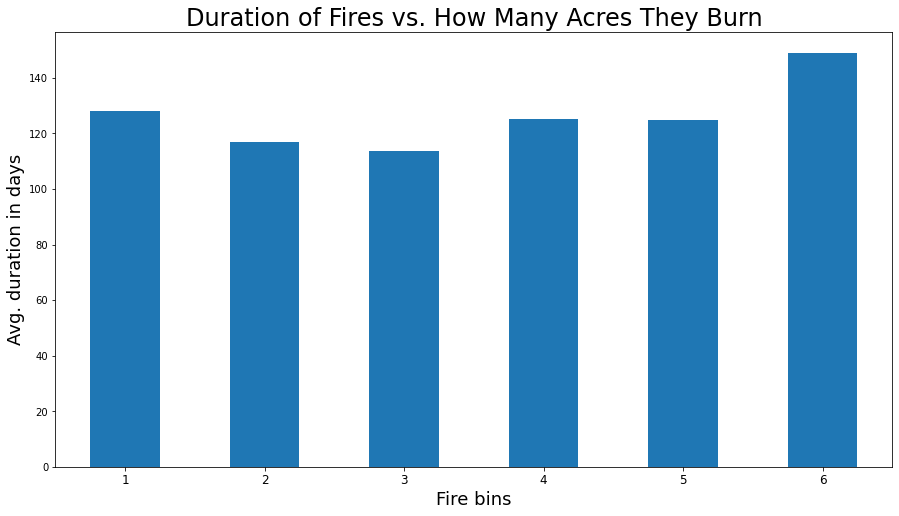

In [25]:
# How long do fires last relative to how big they are?
plt.figure(figsize= (15,8))
df.groupby('fire_bins')['duration'].mean().plot(kind='bar')
plt.ylabel('Avg. duration in days', fontsize= 18)
plt.xlabel('Fire bins', fontsize = 18)
plt.xticks(rotation= 360, fontsize = 12)
plt.title('Duration of Fires vs. How Many Acres They Burn', fontsize = 24);

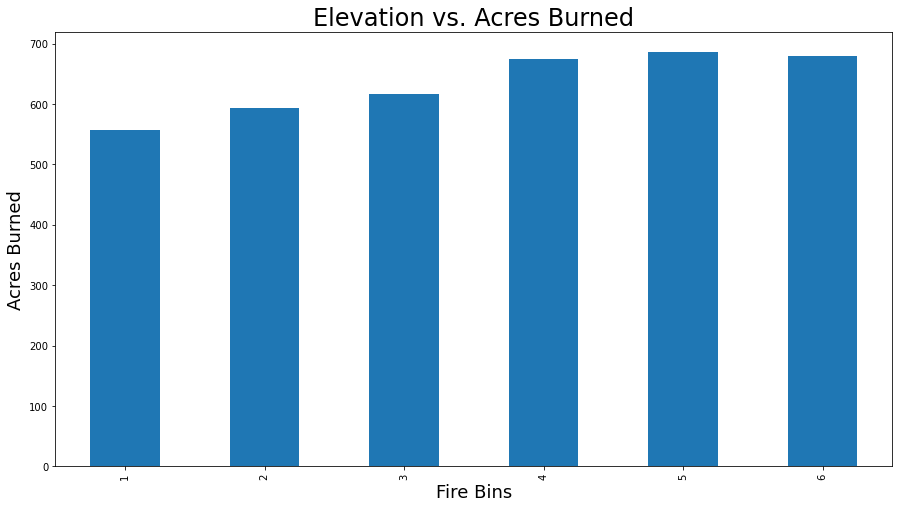

In [26]:
# How much does elevation affect how many acres are burned?
plt.figure(figsize= (15,8))
df.groupby('fire_bins')['elevation'].mean().plot(kind='bar')
plt.xlabel('Fire Bins', fontsize = 18)
plt.ylabel('Acres Burned', fontsize = 18)
plt.title('Elevation vs. Acres Burned', fontsize = 24);

In [27]:
# create a variable of interesting weather conditions to use 
int_features

['avg_monthly_temp',
 'total_monthly_precipitation',
 'extreme_max_temp',
 'extreme_min_temp',
 'dx70',
 'elevation']

In [28]:
# Bin 1
df[df['fire_bins'] == 1][int_features].mean().T

avg_monthly_temp                69.789678
total_monthly_precipitation      0.417823
extreme_max_temp                96.159353
extreme_min_temp                45.753466
dx70                            25.534478
elevation                      557.212924
dtype: float64

In [29]:
# Bin 2
df[df['fire_bins'] == 2][int_features].mean().T

avg_monthly_temp                70.263732
total_monthly_precipitation      0.267222
extreme_max_temp                96.423520
extreme_min_temp                45.964245
dx70                            26.511309
elevation                      593.833499
dtype: float64

In [30]:
# Bin 3
df[df['fire_bins'] == 3][int_features].mean().T

avg_monthly_temp                70.268432
total_monthly_precipitation      0.230314
extreme_max_temp                96.189231
extreme_min_temp                46.379817
dx70                            26.890580
elevation                      617.323910
dtype: float64

In [31]:
# Bin 4
df[df['fire_bins'] == 4][int_features].mean().T

avg_monthly_temp                68.387313
total_monthly_precipitation      0.404350
extreme_max_temp                93.976724
extreme_min_temp                43.783952
dx70                            24.954593
elevation                      674.133265
dtype: float64

In [32]:
# Bin 5
df[df['fire_bins'] == 5][int_features].mean().T

avg_monthly_temp                70.333515
total_monthly_precipitation      0.294854
extreme_max_temp                95.910746
extreme_min_temp                45.512965
dx70                            26.630572
elevation                      685.723353
dtype: float64

In [33]:
# Bin 6
df[df['fire_bins'] == 6][int_features].mean().T

avg_monthly_temp                69.859585
total_monthly_precipitation      0.319893
extreme_max_temp                96.245249
extreme_min_temp                44.876441
dx70                            26.293059
elevation                      678.768814
dtype: float64

---
---

## By County

In [34]:
# Top 10 counties by number of fires
top_county_num_fires = df['county'].value_counts()[:10]
top_county_num_fires

riverside          99
san diego          49
san luis obispo    44
kern               36
butte              36
shasta             34
siskiyou           32
tehama             31
fresno             29
lassen             27
Name: county, dtype: int64

In [35]:
# Bottom 10 counties by number of fires
bottom_county_num_fires = df['county'].value_counts()[-10:]
bottom_county_num_fires

mono           4
colusa         4
san joaquin    4
amador         4
marin          4
santa cruz     3
del norte      3
sierra         2
sutter         2
san mateo      1
Name: county, dtype: int64

In [36]:
# Top 10 counties by total acres burned
top_county_acres = df.groupby('county')['acres_burned'].sum().sort_values(ascending= False)[:10]
top_county_acres

county
mendocino    498960.0
ventura      396034.0
shasta       345947.0
mariposa     203417.0
sonoma       192165.0
butte        175946.0
siskiyou     152761.0
lassen       138079.0
yolo          95998.0
napa          91842.0
Name: acres_burned, dtype: float64

In [37]:
# Bottom 10 counties by total acres burned
bottom_county_acres = df.groupby('county')['acres_burned'].sum().sort_values()[:10]
bottom_county_acres

county
san mateo        50.0
marin           237.0
del norte       387.0
santa cruz      411.0
amador          862.0
sierra          915.0
calaveras       943.0
nevada         1361.0
sacramento     1553.0
santa clara    2032.0
Name: acres_burned, dtype: float64

In [38]:
# Top 10 counties by avg. duration (in days) of fires
top_county_duration = df.groupby('county')['duration'].mean().sort_values(ascending= False)[:10]
top_county_duration

county
plumas        396.755000
sierra        192.500000
orange        186.400000
merced        182.428571
marin         174.750000
madera        167.600000
fresno        167.377241
san benito    166.000000
glenn         163.800000
del norte     162.666667
Name: duration, dtype: float64

In [39]:
# Bottom 10 counties by avg. duration (in days) of fires
bottom_county_duration = df.groupby('county')['duration'].mean().sort_values()[:10]
bottom_county_duration

county
santa cruz     45.000000
placer         47.312857
solano         63.549091
stanislaus     70.560909
yuba           75.303750
ventura        82.311818
sutter         82.500000
alameda        95.653000
santa clara    96.025000
el dorado      96.296842
Name: duration, dtype: float64

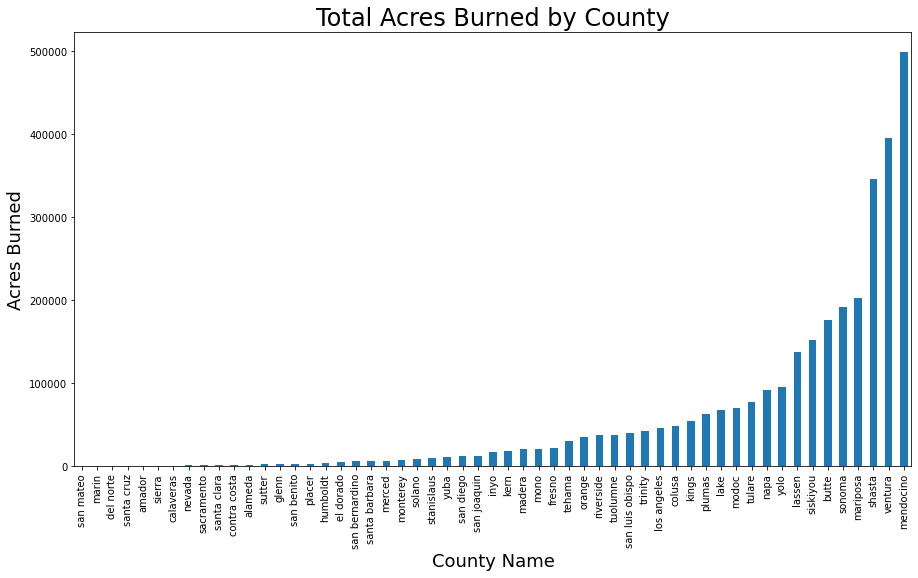

In [40]:
# Plot total acres burned by county
plt.figure(figsize= (15,8))
df.groupby('county')['acres_burned'].sum().sort_values().plot(kind='bar')
plt.xlabel('County Name', fontsize = 18)
plt.ylabel('Acres Burned', fontsize = 18)
plt.title('Total Acres Burned by County', fontsize=24);

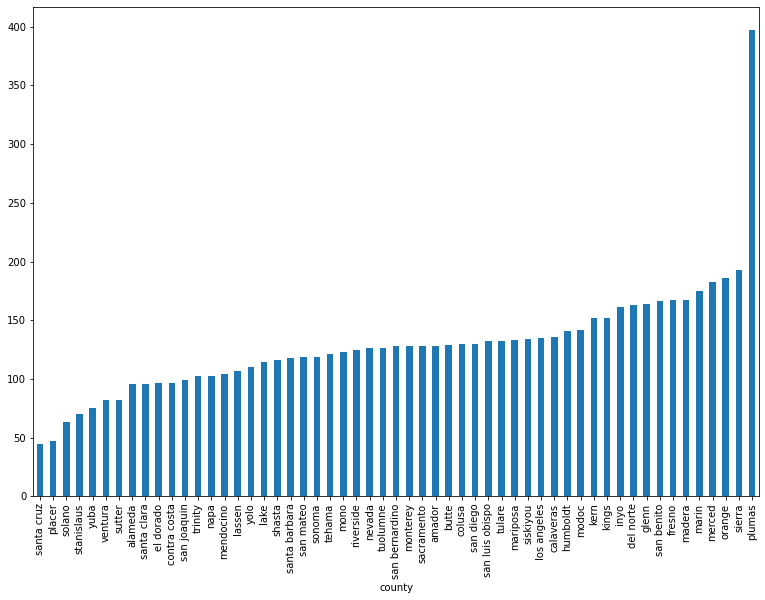

In [41]:
# Plot avg. duration by county
plt.figure(figsize= (13, 9))
df.groupby('county')['duration'].mean().sort_values().plot(kind='bar');

In [42]:
# Look into more detail at plumas because it is an outlier for duration
print(df[df['county'] == 'plumas']['duration'].mean())
print(df[df['county'] == 'plumas']['acres_burned'].mean())
print(df[df['county'] == 'plumas']['acres_burned'].sum())

396.755
7864.875
62919.0


---
---

### Weather Averages vs. Acres Burned/Duration/Number of Fires

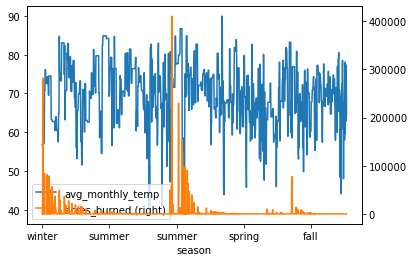

In [43]:
fig, ax = plt.subplots() 
df.plot(x = 'season', y = 'avg_monthly_temp', ax = ax) 
df.plot(x = 'season', y = 'acres_burned', ax = ax, secondary_y = True);

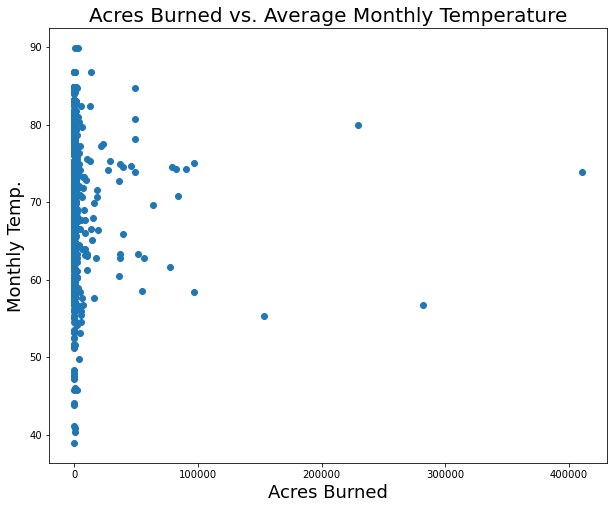

In [44]:
# View the relationship between acres burned and average temperature
plt.figure(figsize=(10, 8))

# Create scatterplot of high prices versus volume.
plt.scatter(df['acres_burned'],
            df['avg_monthly_temp']);

plt.title("Acres Burned vs. Average Monthly Temperature", fontsize = 20)
plt.ylabel("Monthly Temp.", fontsize = 18)
plt.xlabel("Acres Burned", fontsize = 18);

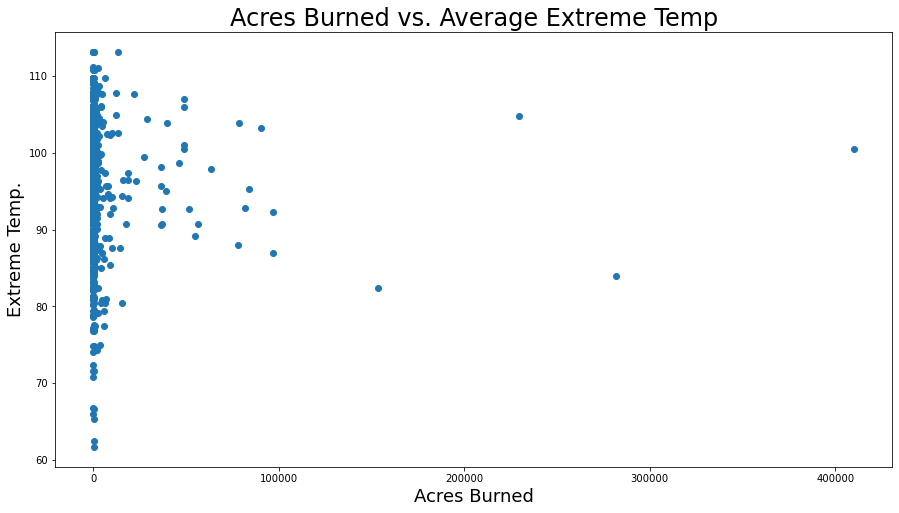

In [45]:
# View the relationship between acres burned and average extreme temp
plt.figure(figsize=(15, 8))


plt.scatter(df['acres_burned'],
            df['extreme_max_temp']);

plt.title("Acres Burned vs. Average Extreme Temp", fontsize = 24)
plt.ylabel("Extreme Temp.", fontsize = 18)
plt.xlabel("Acres Burned", fontsize = 18);

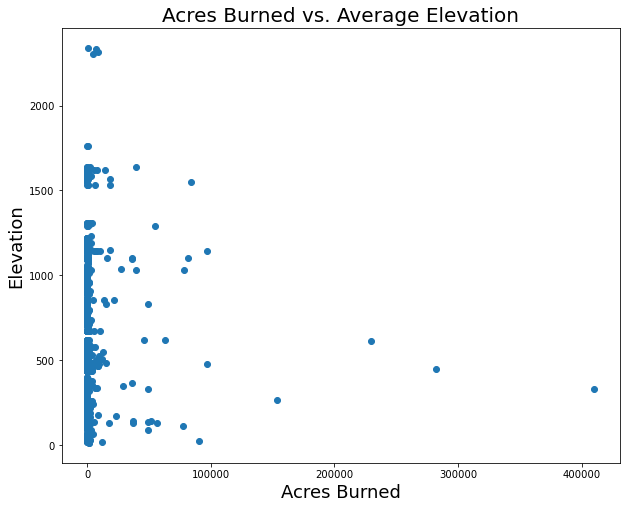

In [46]:
# View the relationship between acres burned and elevation
plt.figure(figsize=(10, 8))

# Create scatterplot of high prices versus volume.
plt.scatter(df['acres_burned'],
            df['elevation']);

plt.title("Acres Burned vs. Average Elevation", fontsize = 20)
plt.ylabel("Elevation", fontsize = 18)
plt.xlabel("Acres Burned", fontsize = 18);

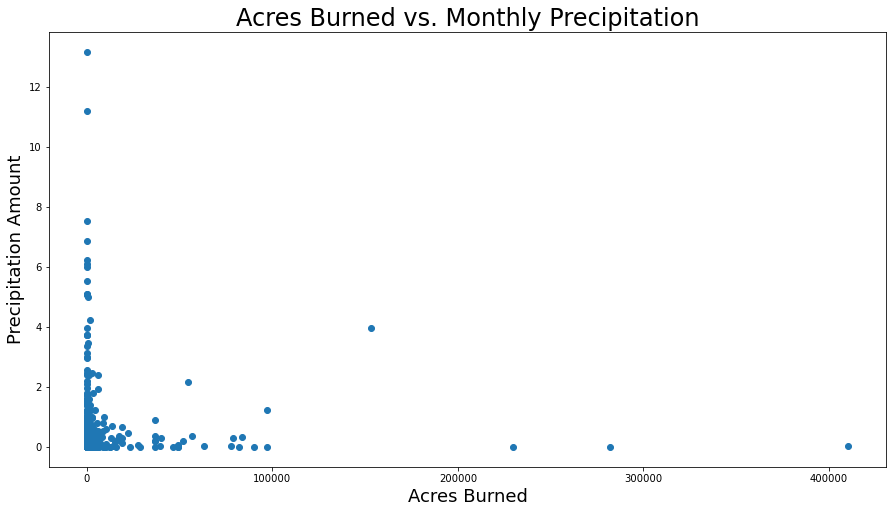

In [47]:
# View the relationship between acres burned and total monthly precipitation
plt.figure(figsize=(15, 8))

plt.scatter(df['acres_burned'],
            df['total_monthly_precipitation']);

plt.title("Acres Burned vs. Monthly Precipitation", fontsize = 24)
plt.ylabel("Precipitation Amount", fontsize = 18)
plt.xlabel("Acres Burned", fontsize = 18);


---
---

## County vs. Weather Conditions

In [48]:
# Create lists of county names based on analysis above
top_county_dur_list = top_county_duration.index.to_list()
bottom_county_dur_list = bottom_county_duration.index.to_list()
top_county_acres_list = top_county_acres.index.to_list()
bottom_county_acres_list = bottom_county_acres.index.to_list()
top_county_num_fires_list = top_county_num_fires.index.to_list()
bottom_county_num_fires_list = bottom_county_num_fires.index.to_list()

In [49]:
# Is there a correlation between duration and weather conditions?
top_dur_df = df[df['county'].isin(top_county_dur_list)][int_features].mean()
bottom_dur_df = df[df['county'].isin(bottom_county_dur_list)][int_features].mean()

In [50]:
print(top_dur_df)
print(bottom_dur_df)

avg_monthly_temp                69.356009
total_monthly_precipitation      0.322404
extreme_max_temp                96.599322
extreme_min_temp                44.176486
dx70                            25.682221
elevation                      602.588805
dtype: float64
avg_monthly_temp                66.909006
total_monthly_precipitation      0.332395
extreme_max_temp                92.721373
extreme_min_temp                44.644333
dx70                            25.010721
elevation                      464.412393
dtype: float64


**Below**--Not sure why these are NaN

In [51]:
# Is there a correlation between acres burned and weather conditions?
print(df[df['county'].isin(top_county_acres)][int_features].mean().T)
print(df[df['county'].isin(bottom_county_acres)][int_features].mean().T)

avg_monthly_temp              NaN
total_monthly_precipitation   NaN
extreme_max_temp              NaN
extreme_min_temp              NaN
dx70                          NaN
elevation                     NaN
dtype: float64
avg_monthly_temp              NaN
total_monthly_precipitation   NaN
extreme_max_temp              NaN
extreme_min_temp              NaN
dx70                          NaN
elevation                     NaN
dtype: float64


In [52]:
# Is there a correlation between number of fires and weather conditions?
print(df[df['county'].isin(top_county_num_fires)][int_features].mean().T)
print(df[df['county'].isin(bottom_county_num_fires)][int_features].mean().T)

avg_monthly_temp              NaN
total_monthly_precipitation   NaN
extreme_max_temp              NaN
extreme_min_temp              NaN
dx70                          NaN
elevation                     NaN
dtype: float64
avg_monthly_temp              NaN
total_monthly_precipitation   NaN
extreme_max_temp              NaN
extreme_min_temp              NaN
dx70                          NaN
elevation                     NaN
dtype: float64


In [53]:
# Check out summary averages by county of different features
df[df['county'] == 'mendocino'].mean().T

latitude                          39.305991
longitude                       -123.230405
acres_burned                   35640.000000
fire_bins                          3.571429
duration                         104.020714
major_incident                     0.500000
avg_wind_speed                     4.014286
avg_monthly_temp                  68.208440
extreme_max_temp                  96.041667
extreme_min_temp                  43.480442
total_monthly_precipitation        0.552384
total_monthly_snowfall             0.000000
highest_daily_snowfall             0.000000
dsnd                               0.000000
dp10                               0.937088
dt00                               0.000000
dt32                               0.670068
dx32                               0.000000
dx70                              25.306548
cooling_degree_days              185.443027
elevation                        352.221338
co2_measured_mole_fraction       407.382143
temp_range                      

---
---

## By Year

In [54]:
df.columns

Index(['date', 'county', 'latitude', 'longitude', 'fire_name', 'acres_burned',
       'fire_bins', 'duration', 'started', 'extinguished', 'major_incident',
       'admin_unit', 'avg_wind_speed', 'avg_monthly_temp', 'extreme_max_temp',
       'extreme_min_temp', 'total_monthly_precipitation',
       'total_monthly_snowfall', 'highest_daily_snowfall', 'dsnd', 'dp10',
       'dt00', 'dt32', 'dx32', 'dx70', 'cooling_degree_days', 'elevation',
       'co2_measured_mole_fraction', 'qc_flag', 'temp_range', 'month',
       'season'],
      dtype='object')

In [55]:
# Create a year column
year_list = []
for n in df['date']:
    year_list.append(n[0:4])
df['year'] = year_list

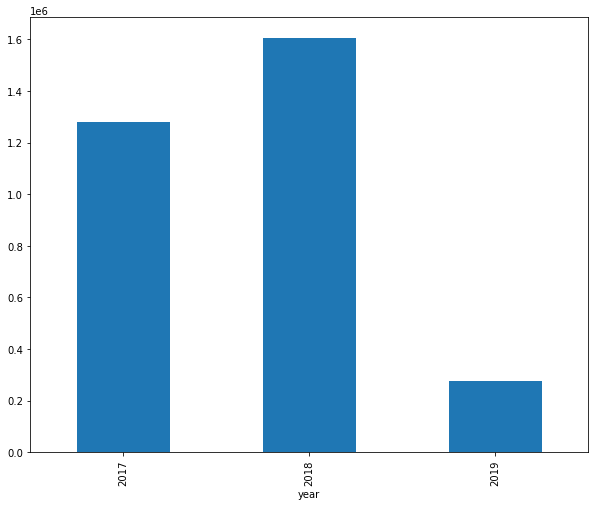

In [56]:
# Plot total acres burned by year
plt.figure(figsize= (10,8))
df.groupby('year')['acres_burned'].sum().plot(kind='bar');

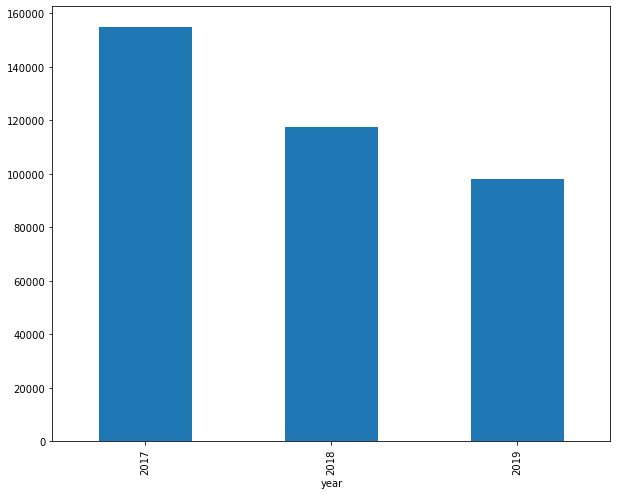

In [57]:
# Plot co2 by year
plt.figure(figsize= (10,8))
df.groupby('year')['co2_measured_mole_fraction'].sum().plot(kind='bar');

---
---

## Acres Burned Over Time

In [58]:
acres_time_df = df[['date', 'acres_burned', 'duration']]
acres_time_df

,date,acres_burned,duration
0,2017-12-01,14.0,24.00
1,2017-12-01,14.0,26.00
2,2017-12-01,281893.0,464.00
3,2017-12-01,40.0,36.00
4,2017-12-01,300.0,33.00
...,...,...,...
902,2019-11-01,19.0,1.00
903,2019-10-01,18.0,0.00
904,2019-10-01,12.0,0.00
905,2019-07-01,10.0,0.38


In [59]:
acres_time_df.set_index('date', inplace=True)
acres_time_df.head(2)

,acres_burned,duration
date,,
2017-12-01,14.0,24.0
2017-12-01,14.0,26.0


In [60]:
acres_time_df['acres_burned'].sort_index().cumsum()

date
2017-02-01          0.0
2017-04-01        126.0
2017-04-01       5864.0
2017-04-01       6014.0
2017-04-01       6029.0
                ...    
2019-11-01    3155601.0
2019-11-01    3158727.0
2019-11-01    3159082.0
2019-11-01    3159101.0
2019-11-01    3161635.0
Name: acres_burned, Length: 907, dtype: float64

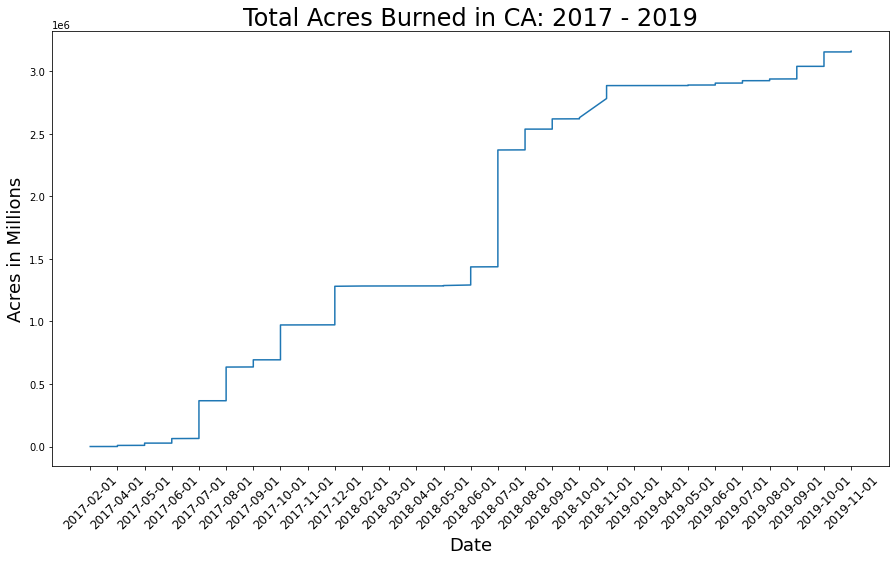

In [61]:
# Plot total acres burned over time for the state of CA

plt.figure(figsize=(15, 8))
plt.plot(acres_time_df['acres_burned'].sort_index().cumsum())
plt.xlabel('Date', fontsize = 18)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Acres in Millions', fontsize = 18)
plt.title('Total Acres Burned in CA: 2017 - 2019', fontsize = 24);